# Comparing datasets

Datasets:
- iDesignRES / OpenEntrance - aggregated (denoted by o_\<something\>)
- pyPSA-Eur - non-aggregated. (denoted by p_\<something\>)

Goals:
- Check the difference of the energy mixes throughout the whole dataset.

Spain:
- What is the energy mix of Spain
- What power generating capacity does Spain have?
- What loads does Spain have?


Questions:
What is the difference between primary and secondary energy?

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import pypsa

# Load the Aggregated Network:


Load the simplified network that was created in the previous aggregation.ipynb notebook.



In [59]:
pypsa_data = '../networks/elec_s_1024_spain.nc'

First, we want to **plot the energy mix in OpenEntrance:**

Load datasets containing redispatching scenarios.



In [60]:
o = pd.read_csv('../networks/OpenEntrance/IAMC_annual_data.csv')

# Select just Region that contains Spain
o_ES = o[o['Region'].str.contains('Spain', case=False, na=False)]

# Show the unique values of the column 'Variable'
print(o_ES['Variable'].unique())

['Network|Electricity|Maximum Flow' 'Capacity|Electricity|Biomass|w/o CCS'
 'Capacity|Electricity|Coal|Hard coal|w/o CCS'
 'Capacity|Electricity|Coal|Lignite|w/o CCS'
 'Capacity|Electricity|Gas|CCGT|w/ CCS'
 'Capacity|Electricity|Gas|CCGT|w/o CCS'
 'Capacity|Electricity|Gas|OCGT|w/o CCS'
 'Capacity|Electricity|Hydro|Pumped Storage'
 'Capacity|Electricity|Hydro|Reservoir'
 'Capacity|Electricity|Hydro|Run of River' 'Capacity|Electricity|Nuclear'
 'Capacity|Electricity|Oil|w/o CCS' 'Capacity|Electricity|Solar|PV'
 'Capacity|Electricity|Wind|Onshore'
 'Capital Cost|Electricity|Biomass|w/ CCS'
 'Capital Cost|Electricity|Biomass|w/o CCS'
 'Capital Cost|Electricity|Coal|Hard coal|w/ CCS'
 'Capital Cost|Electricity|Coal|Hard coal|w/o CCS'
 'Capital Cost|Electricity|Coal|Lignite|w/o CCS'
 'Capital Cost|Electricity|Gas|CCGT|w/ CCS'
 'Capital Cost|Electricity|Gas|CCGT|w/o CCS'
 'Capital Cost|Electricity|Gas|OCGT|w/o CCS'
 'Capital Cost|Electricity|Geothermal'
 'Capital Cost|Electricity|Hydrogen|O

In [61]:

o_ES[o_ES['Variable'] == 'Network|Electricity|Maximum Flow']

,Model,Scenario,Region,Variable,Unit,2030
111,GENeSYS-MOD 3.1,Techno-Friendly 2.0,France>Spain,Network|Electricity|Maximum Flow,MW,5000.0
217,GENeSYS-MOD 3.1,Techno-Friendly 2.0,Portugal>Spain,Network|Electricity|Maximum Flow,MW,4500.0
297,GENeSYS-MOD 3.1,Techno-Friendly 2.0,Spain>France,Network|Electricity|Maximum Flow,MW,5000.0
298,GENeSYS-MOD 3.1,Techno-Friendly 2.0,Spain>Portugal,Network|Electricity|Maximum Flow,MW,4100.0


In [62]:
# Select just the rows that contain 'Capacity|Electricity' in the column 'Variable'
o_ES_Cap_El = o_ES[o_ES['Variable'].str.contains('Capacity\|Electricity', case=False, na=False)].copy()

# Remove Capacity|Electricity from the column 'Variable'
o_ES_Cap_El['Variable'] = o_ES_Cap_El['Variable'].str.replace('Capacity|Electricity|', '')
o_ES_Cap_El

# Drop First Three columns
o_ES_Cap_El = o_ES_Cap_El.drop(['Model', 'Scenario', 'Region'], axis=1)
o_ES_Cap_El.head()

,Variable,Unit,2030
227,Biomass|w/o CCS,MW,1747.280606
228,Coal|Hard coal|w/o CCS,MW,3946.899889
229,Coal|Lignite|w/o CCS,MW,360.000000
230,Gas|CCGT|w/ CCS,MW,448.838921
231,Gas|CCGT|w/o CCS,MW,21434.738832


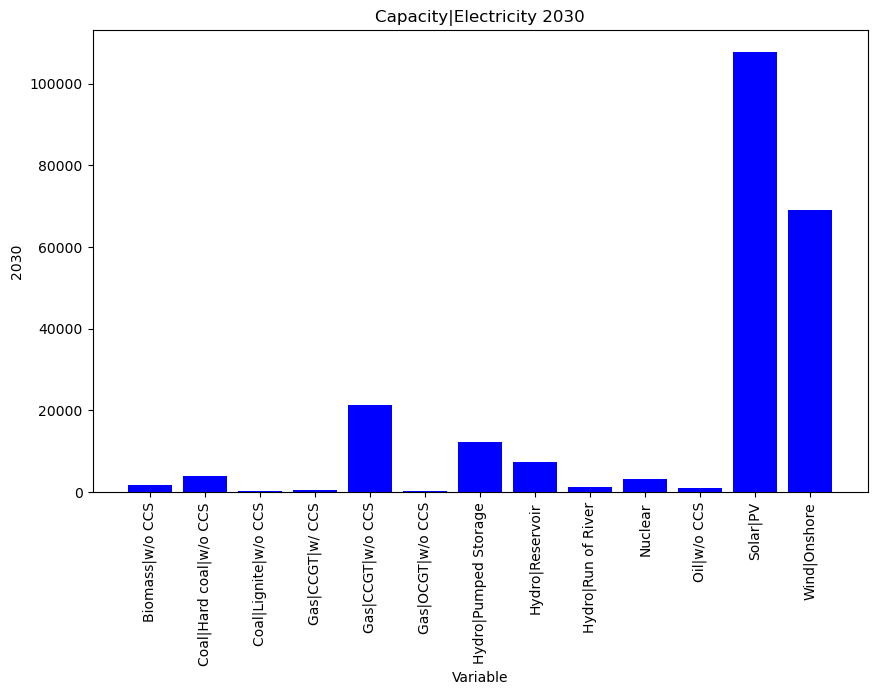

In [63]:
# Plot the 2030 Column in a stacked bar chart. X axis is the 'Variable' column and Y axis is the '2030' column. In matplotlib.
plt.figure(figsize=(10, 6))
plt.bar(o_ES_Cap_El['Variable'], o_ES_Cap_El['2030'], color='blue')
plt.xlabel('Variable')
plt.ylabel('2030')
plt.title('Capacity|Electricity 2030')
plt.xticks(rotation=90)
plt.show()

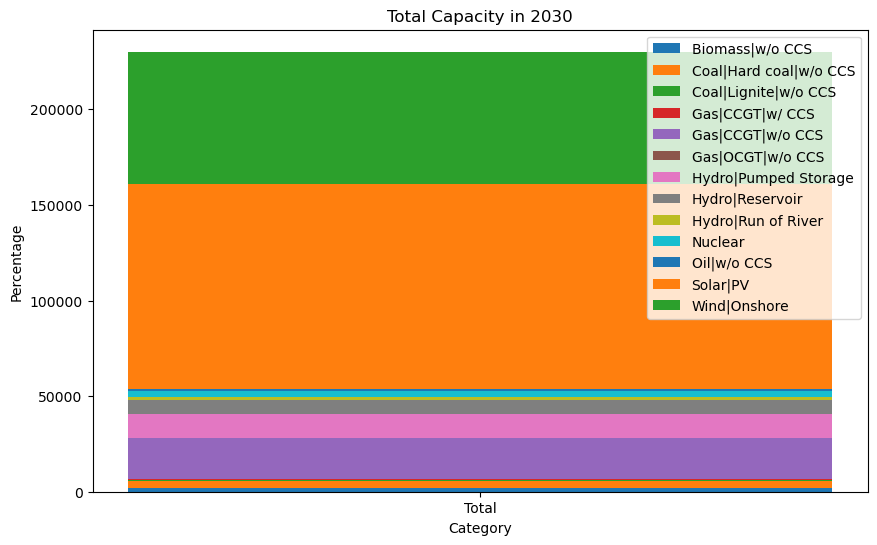

In [64]:
# Initialize the bottom for the first segment of the stacked bar
bottom = 0

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Sort dataframe by Variable column, alphabetically
o_ES_Cap_El = o_ES_Cap_El.sort_values('Variable').copy()

# Plot each segment of the bar
for index, row in o_ES_Cap_El.iterrows():
    plt.bar('Total', row['2030'], bottom=bottom, label=row['Variable'])
    bottom += row['2030']

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Total Capacity in 2030')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [65]:
# TODO: Make bar plot and legend the same order
# TODO: Compare barplot with data from pyPSA-Eur.


In [66]:
# Import the data from pyPSA-Eur
p = pypsa.Network(pypsa_data)
p

INFO:pypsa.io:Imported network elec_s_1024_spain.nc has buses, carriers, generators, lines, links, loads, storage_units


PyPSA Network
Components:
 - Bus: 87
 - Carrier: 15
 - Generator: 2711
 - Line: 182
 - Link: 15
 - Load: 664
 - StorageUnit: 209
Snapshots: 1

In [67]:

p_ES_Cap_El = p.generators.groupby('carrier')['p_nom']
p_ES_Cap_El
# Mostrar los primeros registros de generadores para entender su estructura
print(p.generators.head())
# Filter generators that start with 'ES'
p_ES_generators = p.generators[p.generators.index.str.startswith('ES')]
p_ES_generators.head()


                 p_nom_max      weight        p_nom   capital_cost  \
Generator                                                            
BE1 1 biomass          inf    0.000000    95.000000  278083.065356   
BE1 1 nuclear          inf    0.000000  3008.000000  706772.616769   
BE1 1 onwind    555.928954  155.825724    85.533681   96085.888020   
BE1 1 ror              inf    9.900000     9.900000  299140.224929   
BE1 1 solar    1048.659058  111.983866   162.590868   35602.071244   

               efficiency    p_nom_min  marginal_cost  carrier  \
Generator                                                        
BE1 1 biomass        0.47    95.000000      14.893617  biomass   
BE1 1 nuclear        0.33  3008.000000      11.378788  nuclear   
BE1 1 onwind         1.00    85.533681       0.015000   onwind   
BE1 1 ror            0.90     0.000000       0.000000      ror   
BE1 1 solar          1.00   162.590868       0.010000    solar   

               p_nom_extendable bus  ...  shut

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,carrier,p_nom_extendable,bus,...,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
ES1 0 onwind,1.285624e+04,2766.003054,512.304511,96085.888020,1.0000,512.304511,0.015000,onwind,True,ES1 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
ES1 0 solar,4.776613e+03,861.812901,162.178750,35602.071244,1.0000,162.178750,0.010000,solar,True,ES1 0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
ES1 1 onwind,8.547035e+03,1426.800874,264.261055,96085.888020,1.0000,264.261055,0.015000,onwind,True,ES1 1,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
ES1 1 solar,2.299288e+03,396.746721,74.648141,35602.071244,1.0000,74.648141,0.010000,solar,True,ES1 1,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
ES1 10 CCGT,inf,0.000000,1585.200000,99027.729293,0.5736,1585.200000,39.241841,CCGT,False,ES1 10,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [68]:
# Get the energy capacities from pypsa and aggregate them to the same categories as in the OpenEntrance data
p_ES_Cap_El = p_ES_generators.groupby('carrier')['p_nom'].sum()
print(p_ES_Cap_El)

carrier
CCGT          27349.332000
OCGT             23.000000
biomass          20.000000
coal           4979.097091
nuclear        7117.200000
offwind-ac        3.363219
offwind-dc        0.000000
oil             466.971000
onwind        27083.815248
ror             147.008248
solar         11785.005989
Name: p_nom, dtype: float64


In [69]:
# Get the energy capacities from pypsa and aggregate them to the same categories as in the OpenEntrance data
print(p_ES_Cap_El)
print(o_ES_Cap_El)

# Compare the two dataframes - get them into one.

print("pyPSA total cap", p_ES_Cap_El.sum())
print("OpenEntrance total cap", o_ES_Cap_El['2030'].sum())
print("pyPSA only has ", p_ES_Cap_El.sum()/o_ES_Cap_El['2030'].sum()*100, "% of the capacity in OpenEntrance")

carrier
CCGT          27349.332000
OCGT             23.000000
biomass          20.000000
coal           4979.097091
nuclear        7117.200000
offwind-ac        3.363219
offwind-dc        0.000000
oil             466.971000
onwind        27083.815248
ror             147.008248
solar         11785.005989
Name: p_nom, dtype: float64
                   Variable Unit           2030
227         Biomass|w/o CCS   MW    1747.280606
228  Coal|Hard coal|w/o CCS   MW    3946.899889
229    Coal|Lignite|w/o CCS   MW     360.000000
230         Gas|CCGT|w/ CCS   MW     448.838921
231        Gas|CCGT|w/o CCS   MW   21434.738832
232        Gas|OCGT|w/o CCS   MW     246.000000
233    Hydro|Pumped Storage   MW   12371.794673
234         Hydro|Reservoir   MW    7490.000000
235      Hydro|Run of River   MW    1330.000000
236                 Nuclear   MW    3119.177653
237             Oil|w/o CCS   MW    1007.308828
238                Solar|PV   MW  107656.499004
239            Wind|Onshore   MW   69005.61

As we can see, the pyPSA is way less. What year is this data for? And are we taking into account all data?


In [70]:
z_1024 = pypsa.Network('../networks/elec_s_1024.nc')
z_512 = pypsa.Network('../networks/elec_s_512.nc')

INFO:pypsa.io:Imported network elec_s_1024.nc has buses, carriers, generators, lines, links, loads, storage_units
INFO:pypsa.io:Imported network elec_s_512.nc has buses, carriers, generators, lines, links, loads, storage_units


In [71]:
# Get generators with bus that contains 'ES'
print(z_1024.generators[z_1024.generators['bus'].str.contains('ES')].groupby('carrier')['p_nom'].sum())
print(z_512.generators[z_512.generators['bus'].str.contains('ES')].groupby('carrier')['p_nom'].sum())

carrier
CCGT          27349.332000
OCGT             23.000000
biomass          20.000000
coal           4979.097091
nuclear        7117.200000
offwind-ac        3.363219
offwind-dc        0.000000
oil             466.971000
onwind        27083.815248
ror             147.008248
solar         11785.005989
Name: p_nom, dtype: float64
carrier
CCGT          27349.332000
OCGT             23.000000
biomass          20.000000
coal           4979.097091
nuclear        7117.200000
offwind-ac        3.363219
offwind-dc        0.000000
oil             466.971000
onwind        27083.815248
ror             147.008248
solar         11785.005989
Name: p_nom, dtype: float64


So, with the different number of buses, the generator numbers are still the same...

In [72]:
print("First snapshot:", z_1024.snapshots[0])
print("Last snapshot:", z_1024.snapshots[-1])

First snapshot: 2013-01-01 00:00:00
Last snapshot: 2013-12-31 23:00:00


In [73]:
p_ES_Cap_El.index

Index(['CCGT', 'OCGT', 'biomass', 'coal', 'nuclear', 'offwind-ac',
       'offwind-dc', 'oil', 'onwind', 'ror', 'solar'],
      dtype='object', name='carrier')

In [74]:
oe_to_pypsa_map = {
    "Biomass|w/o CCS": "Biomass",
    "Coal|Hard coal|w/o CCS": "Coal",
    "Coal|Lignite|w/o CCS": "Coal",  # Adding to the same 'coal' category
    "Gas|CCGT|w/o CCS": "Gas",
    "Gas|OCGT|w/o CCS": "Gas",
    "Hydro|Pumped Storage": "Hydro",  # Assuming 'hydro' is a combined category in PyPSA
    "Hydro|Reservoir": "Hydro",  # Assuming 'hydro' is a combined category in PyPSA
    "Hydro|Run of River": "Hydro",
    "Nuclear": "Nuclear",
    "Oil|w/o CCS": "Oil",
    "Solar|PV": "Solar",
    "Wind|Onshore": "Wind"
}

pypsa_simplified_map = {
    "biomass": "Biomass",
    "coal": "Coal",
    "CCGT": "Gas",
    "OCGT": "Gas",
    "hydro": "Hydro",
    "ror": "Hydro",
    "nuclear": "Nuclear",
    "oil": "Oil",
    "solar": "Solar",
    "onwind": "Wind",
    "offwind": "Wind"
}

o_ES_Cap_El['Source'] = o_ES_Cap_El['Variable'].map(oe_to_pypsa_map)
o_ES_Cap_Aggregated = o_ES_Cap_El.groupby('Source')['2030'].sum()

# Turn pyPSA data into a dataframe
p_ES_Cap_El = p_ES_Cap_El.to_frame()

# Get the energy capacities from pypsa and aggregate them to the same categories as in the OpenEntrance data
p_ES_Cap_El['Source'] = p_ES_Cap_El.index.map(pypsa_simplified_map)
p_ES_Cap_Aggregated = p_ES_Cap_El.groupby('Source')['p_nom'].sum()
p_ES_Cap_Aggregated

Source
Biomass       20.000000
Coal        4979.097091
Gas        27372.332000
Hydro        147.008248
Nuclear     7117.200000
Oil          466.971000
Solar      11785.005989
Wind       27083.815248
Name: p_nom, dtype: float64

In [75]:
o_ES_Cap_Aggregated

Source
Biomass      1747.280606
Coal         4306.899889
Gas         21680.738832
Hydro       21191.794673
Nuclear      3119.177653
Oil          1007.308828
Solar      107656.499004
Wind        69005.610185
Name: 2030, dtype: float64

In [76]:

#Merge o_ES_Cap_Aggregated and p_ES_Cap_El
merged = pd.concat([p_ES_Cap_Aggregated,o_ES_Cap_Aggregated], axis=1)

#Change the column names to 'OpenEntrance (2030)' and 'pyPSA (2013)'
merged.columns = [ 'pyPSA (2013)','OpenEntrance (2030)']

# Get percentage values
merged_percentage = merged.copy()
merged_percentage['pyPSA (2013)'] = merged['pyPSA (2013)'] / merged['pyPSA (2013)'].sum() * 100
merged_percentage['OpenEntrance (2030)'] = merged['OpenEntrance (2030)'] / merged['OpenEntrance (2030)'].sum() * 100

# Flip the dataframes:
merged = merged.T
merged_percentage = merged_percentage.T

merged_percentage

Source,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind
pyPSA (2013),0.025326,6.304935,34.661057,0.186154,9.012373,0.591316,14.923126,34.295714
OpenEntrance (2030),0.760629,1.874886,9.438091,9.225243,1.357845,0.438503,46.865182,30.039622


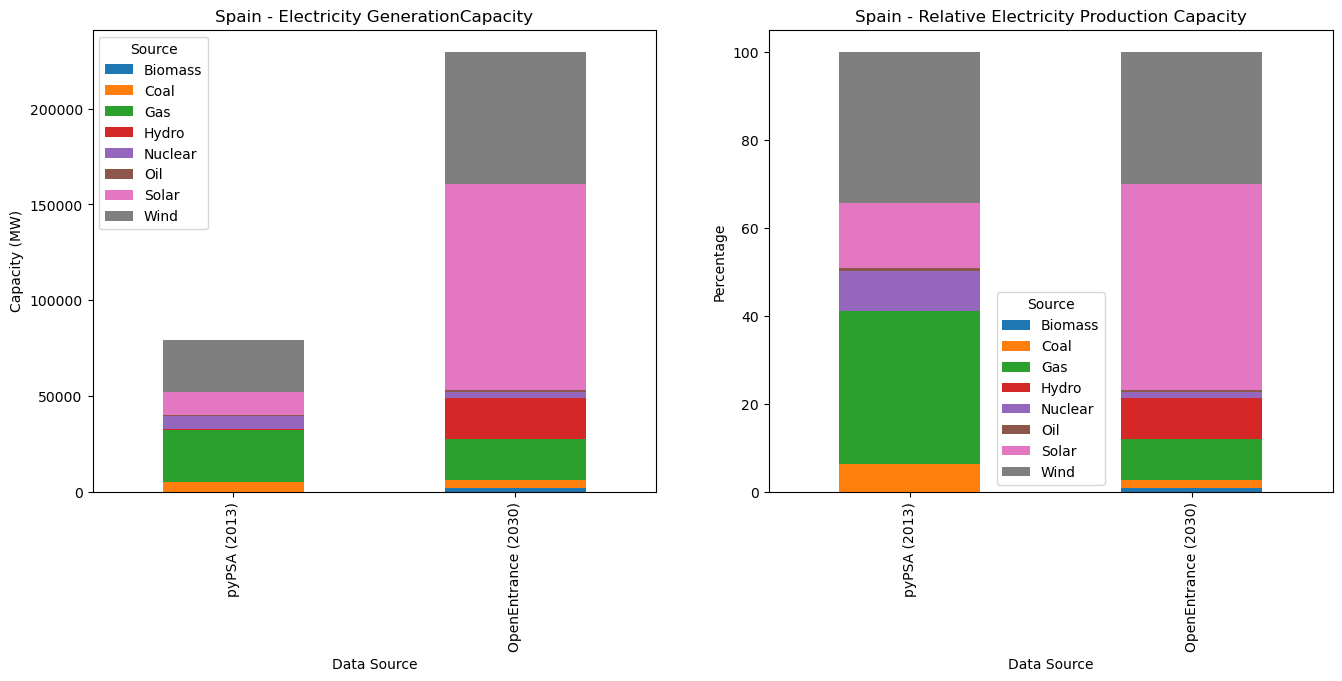

In [77]:
# Plot the data in stacked charts
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Have the legend go in the same order as the bars
#merged = merged.sort_values(by=index, axis=1, ascending=True)

merged.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Spain - Electricity GenerationCapacity')
ax[0].set_ylabel('Capacity (MW)')
ax[0].set_xlabel('Data Source')

merged_percentage.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Spain - Relative Electricity Production Capacity')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Data Source')

plt.show()


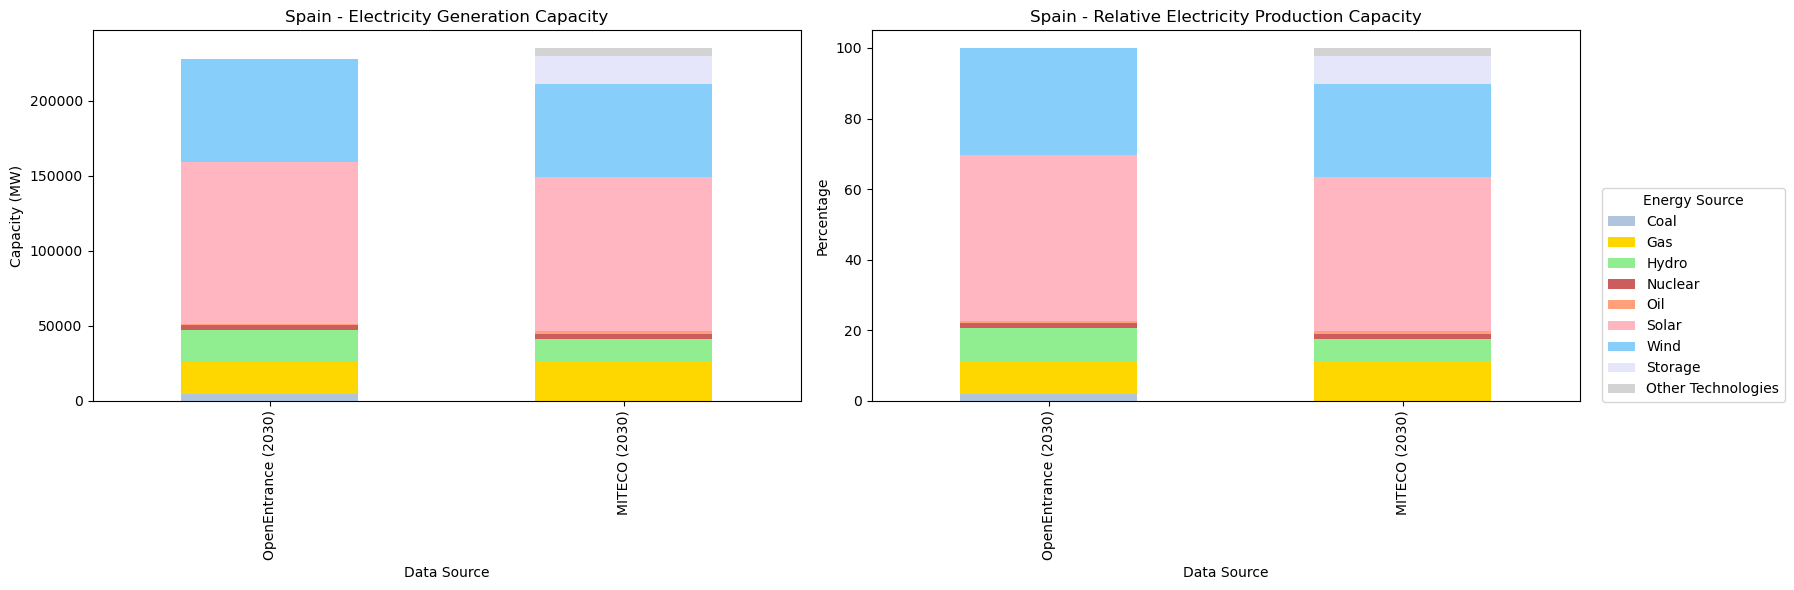

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos para OpenEntrance y MITECO
labels_open_entrance = ['Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind']
capacity_open_entrance = [4306.899889, 21680.738832, 21191.794673, 3119.177653, 1007.308828, 107656.499004, 69005.610185]

labels_miteco = ['Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind', 'Storage', 'Other Technologies']
capacity_miteco = [0, 26612, 14511, 3181, 1830, 103187, 62044, 18543, 5142]

# Crear DataFrames
data_open_entrance = pd.DataFrame([capacity_open_entrance], columns=labels_open_entrance, index=['OpenEntrance (2030)'])
data_miteco = pd.DataFrame([capacity_miteco], columns=labels_miteco, index=['MITECO (2030)'])

# Unificar las etiquetas para que coincidan
labels = ['Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind', 'Storage', 'Other Technologies']
data_open_entrance = data_open_entrance.reindex(columns=labels, fill_value=0)
data_miteco = data_miteco.reindex(columns=labels, fill_value=0)

# Combinar los DataFrames
merged = pd.concat([data_open_entrance, data_miteco], sort=False).fillna(0)
merged_percentage = merged.div(merged.sum(axis=1), axis=0) * 100

# Colores más pálidos y consistentes para cada categoría
colors = {
    'Coal': '#B0C4DE',
    'Gas': '#FFD700',
    'Hydro': '#90EE90',
    'Nuclear': '#CD5C5C',
    'Oil': '#FFA07A',
    'Solar': '#FFB6C1',
    'Wind': '#87CEFA',
    'Storage': '#E6E6FA',
    'Other Technologies': '#D3D3D3'
}

# Asignar colores a los datos combinados
color_list = [colors[label] for label in labels]

# Plotear los datos en gráficos apilados
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de capacidad de generación
merged.plot(kind='bar', stacked=True, ax=ax[0], color=color_list)
ax[0].set_title('Spain - Electricity Generation Capacity')
ax[0].set_ylabel('Capacity (MW)')
ax[0].set_xlabel('Data Source')
ax[0].get_legend().remove()  # Eliminar la leyenda del gráfico

# Gráfico de capacidad relativa
merged_percentage.plot(kind='bar', stacked=True, ax=ax[1], color=color_list)
ax[1].set_title('Spain - Relative Electricity Production Capacity')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Data Source')
ax[1].get_legend().remove()  # Eliminar la leyenda del gráfico

# Colocar la leyenda fuera de las gráficas
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Energy Source', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()



In [79]:
# Now, can we do this for the entire european market?

y = pypsa.Network('../networks/elec_s_1024.nc')


INFO:pypsa.io:Imported network elec_s_1024.nc has buses, carriers, generators, lines, links, loads, storage_units


In [80]:
p_EU_aggr = y.generators.groupby('carrier')['p_nom'].sum()

In [81]:
o_Cap_El = o[o['Variable'].str.contains('Capacity\|Electricity', case=False, na=False)].copy()
o_Cap_El['Region'].unique()

array(['BigFrance', 'Portugal', 'Spain'], dtype=object)

# Calculating the capacities

In [22]:
import pandas as pd

# Import the data from OpenEntrance 
RES = pd.read_csv('../networks/OpenEntrance/RES_RenewableUnits.csv', sep=';')
# Select the rows with the Zone that starts with 'ES'
RES_ES = RES[RES['Zone'].str.startswith('ES')]



# Wind

In [23]:
# Sum the rows with the name onwind of RES_ES. Give me the sum of the column 'Capacity'
print(RES_ES[RES_ES['Name'] == 'onwind']['Capacity'].sum())
# Call the summatory one column with name Wind and the other column with the capacity which is the sum of the column 'Capacity'
RES_ES.loc[RES_ES['Name'] == 'onwind', 'Name'] = 'Wind'

26825.85


# Solar

In [35]:
# Sum the rows with the name solar of RES_ES. Give me the sum of the column 'Capacity'. 
print(RES_ES[RES_ES['Name'] == 'solar']['Capacity'].sum())
# Call the summatory one column with name Solar and the other column with the capacity which is the sum of the column 'Capacity'.
RES_ES.loc[RES_ES['Name'] == 'solar', 'Name'] = 'Solar'

11681.550000000001


# Hydro

In [19]:


# Import the data from OpenEntrance of SS_SeasonalStorage
SS = pd.read_csv('../networks/OpenEntrance/SS_SeasonalStorage.csv', sep=';')
# Select the rows with the Zone that starts with 'ES'
SS_ES = SS[SS['Zone'].str.startswith('ES')]
# Import the data from OpenEntrance of STS?ShortTermStorage
STS = pd.read_csv('../networks/OpenEntrance/STS_ShortTermStorage.csv', sep=';')
# Select the rows with the Zone that starts with 'ES'
STS_ES = STS[STS['Zone'].str.startswith('ES')]
# Combine the information only of SS_ES and STS_ES, but in STS_ES take  only the rows with Pumped Storage.
storage_ES = pd.concat([SS_ES, STS_ES[STS_ES['Name'] == 'Pumped Storage']])
#Change the column of Max Power to Capacity
storage_ES.rename(columns={'MaxPower':'Capacity'}, inplace=True)
# Call the summatory one column with name Hydro and the other column with the capacity which is the sum of the column 'Capacity'.
storage_ES.loc[storage_ES['Name'] == 'Pumped Storage', 'Name'] = 'Hydro'
# Sum the rows with the name Hydro of storage_ES. Give me the sum of the column 'Capacity'.
print(storage_ES[storage_ES['Name'] == 'Hydro']['Capacity'].sum())





12371.794672999999


# Storage

In [21]:


# Import the data from OpenEntrance of STS?ShortTermStorage
STS = pd.read_csv('../networks/OpenEntrance/STS_ShortTermStorage.csv', sep=';')
# Select the rows with the Zone that starts with 'ES'
STS_ES = STS[STS['Zone'].str.startswith('ES')]
# Do the summatory of the Rows with Lithium-Ion and call it Storage
print(STS_ES[STS_ES['Name'] == 'Lithium-Ion']['MaxPower'].sum())
# Call the summatory one column with name Storage and the other column with the capacity which is the sum of the column 'Capacity'.
STS_ES.loc[STS_ES['Name'] == 'Lithium-Ion', 'Name'] = 'Storage'




13730.7743374


In [25]:
# Import the data from OpenEntrance of TU_ThermalUnits
TU = pd.read_csv('../networks/OpenEntrance/TU_ThermalUnits.csv', sep=';')
# Select the rows with the Zone that starts with 'ES'
TU_ES = TU[TU['Zone'].str.startswith('ES')]


# CCGT

In [29]:
# Sum the rows with the name starts with CCGT of TU_ES. Give me the sum of the column 'MaxPower'
print(TU_ES[TU_ES['Name'].str.startswith('CCGT')]['MaxPower'].sum())

26305.329999999998


# Oil

In [30]:
# Sum the rows with the name starts with oil of TU_ES. Give me the sum of the column 'MaxPower'
print(TU_ES[TU_ES['Name'].str.startswith('oil')]['MaxPower'].sum())

271.77


# OCGT

In [31]:
# Sum the rows with the name starts with oil of TU_ES. Give me the sum of the column 'MaxPower'
print(TU_ES[TU_ES['Name'].str.startswith('OCGT')]['MaxPower'].sum())

23.0


# Nuclear

In [32]:
# Sum the rows with the name starts with oil of TU_ES. Give me the sum of the column 'MaxPower'
print(TU_ES[TU_ES['Name'].str.startswith('nuclear')]['MaxPower'].sum())

7117.2


# Biomass

In [34]:
# Sum the rows with the name starts with oil of TU_ES. Give me the sum of the column 'MaxPower'
print(TU_ES[TU_ES['Name'].str.startswith('biomass')]['MaxPower'].sum())

20.0


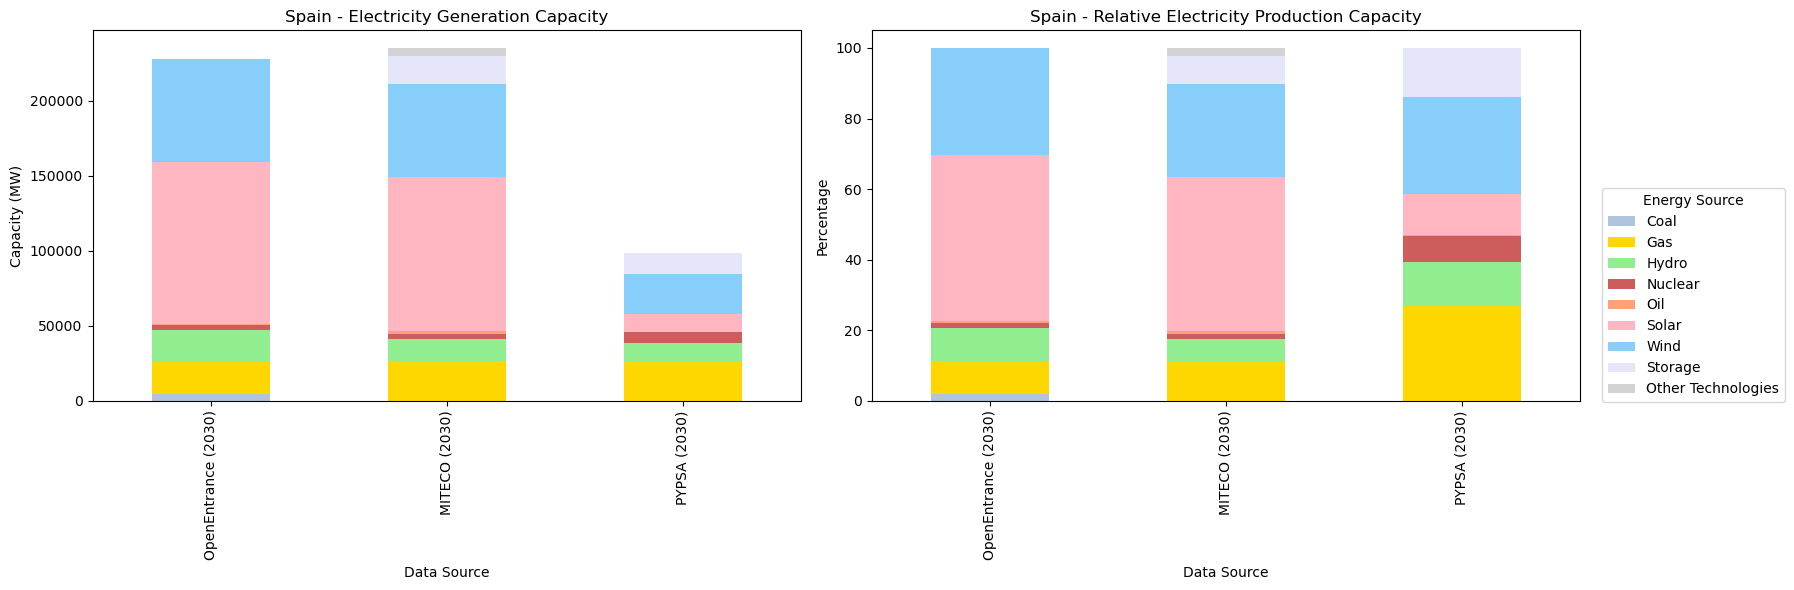

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos para OpenEntrance y MITECO
labels_open_entrance = ['Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind']
capacity_open_entrance = [4306.899889, 21680.738832, 21191.794673, 3119.177653, 1007.308828, 107656.499004, 69005.610185]

labels_miteco = ['Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind', 'Storage', 'Other Technologies']
capacity_miteco = [0, 26612, 14511, 3181, 1830, 103187, 62044, 18543, 5142]

labels_pypsa = ['Wind', 'Solar', 'Hydro', 'Storage', 'Gas', 'Oil', 'Nuclear']
capacity_pypsa = [26825, 11681.55, 12371.79, 13730.77, 26305, 271.77, 7117.2]

# Crear DataFrames
data_open_entrance = pd.DataFrame([capacity_open_entrance], columns=labels_open_entrance, index=['OpenEntrance (2030)'])
data_miteco = pd.DataFrame([capacity_miteco], columns=labels_miteco, index=['MITECO (2030)'])
data_pypsa = pd.DataFrame([capacity_pypsa], columns=labels_pypsa, index=['PYPSA (2030)'])

# Unificar las etiquetas para que coincidan
labels = ['Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind', 'Storage', 'Other Technologies']
data_open_entrance = data_open_entrance.reindex(columns=labels, fill_value=0)
data_miteco = data_miteco.reindex(columns=labels, fill_value=0)
data_pypsa = data_pypsa.reindex(columns=labels, fill_value=0)

# Combinar los DataFrames
merged = pd.concat([data_open_entrance, data_miteco, data_pypsa], sort=False).fillna(0)
merged_percentage = merged.div(merged.sum(axis=1), axis=0) * 100

# Colores más pálidos y consistentes para cada categoría
colors = {
    'Coal': '#B0C4DE',
    'Gas': '#FFD700',
    'Hydro': '#90EE90',
    'Nuclear': '#CD5C5C',
    'Oil': '#FFA07A',
    'Solar': '#FFB6C1',
    'Wind': '#87CEFA',
    'Storage': '#E6E6FA',
    'Other Technologies': '#D3D3D3'
}

# Asignar colores a los datos combinados
color_list = [colors[label] for label in labels]

# Plotear los datos en gráficos apilados
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de capacidad de generación
merged.plot(kind='bar', stacked=True, ax=ax[0], color=color_list)
ax[0].set_title('Spain - Electricity Generation Capacity')
ax[0].set_ylabel('Capacity (MW)')
ax[0].set_xlabel('Data Source')
ax[0].get_legend().remove()  # Eliminar la leyenda del gráfico

# Gráfico de capacidad relativa
merged_percentage.plot(kind='bar', stacked=True, ax=ax[1], color=color_list)
ax[1].set_title('Spain - Relative Electricity Production Capacity')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Data Source')
ax[1].get_legend().remove()  # Eliminar la leyenda del gráfico

# Colocar la leyenda fuera de las gráficas
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Energy Source', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [86]:
# Do the summatory of TU_ES,STS_ES,SS_ES,RES_ES
TOT_ES= TU_ES['MaxPower'].sum()+STS_ES['MaxPower'].sum()+SS_ES['MaxPower'].sum()+RES_ES['Capacity'].sum()
print(TOT_ES)

110723.6690104


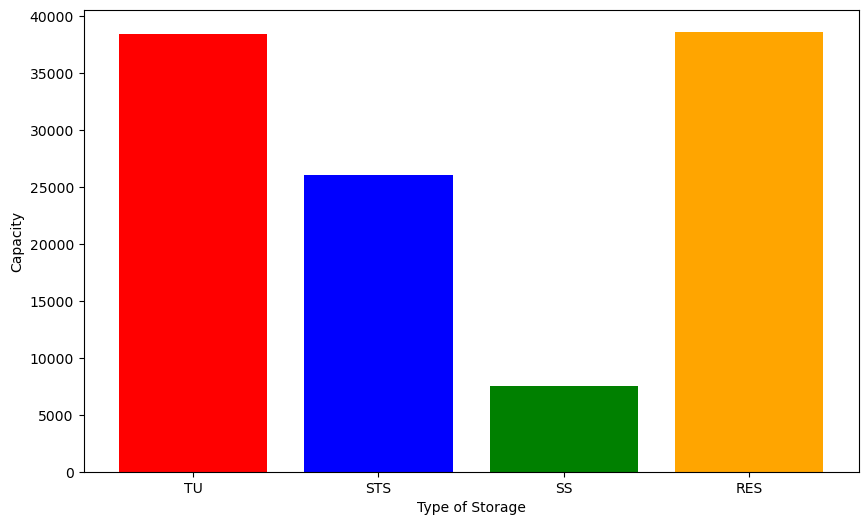

In [94]:

#write everything splitted in the same bar 
plt.figure(figsize=(10, 6))
plt.bar(['TU', 'STS', 'SS', 'RES'], [TU_ES['MaxPower'].sum(), STS_ES['MaxPower'].sum(), SS_ES['MaxPower'].sum(), RES_ES['Capacity'].sum()], color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Type of Storage')
plt.ylabel('Capacity')
plt.show()





